<a href="https://colab.research.google.com/github/nakul8820/Computer_vision/blob/main/bengali_fish_curry_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
zip_path = '/content/Fish_curry_dataset.zip'


In [2]:
import os

# Define the destination folder
dest_root = '/content/custom_data'
os.makedirs(dest_root, exist_ok=True)

# Unzip the file (adjust 'zip_path' if you used Option A)
!unzip -q {zip_path if 'zip_path' in locals() else '/content/dataset.zip'} -d {dest_root}


In [19]:
import random
import shutil
import os

# Define the destination folder
dest_root = '/content/custom_data'
# os.makedirs(dest_root, exist_ok=True) # Already done if `u7nfi3XOoxy1` ran

# Correct the paths to include the dataset's top-level directory
img_src = os.path.join(dest_root, 'Fish_curry_dataset', 'images')
print(img_src)
lbl_src = os.path.join(dest_root, 'Fish_curry_dataset', 'labels')

# Create the required destination subfolders
os.makedirs(os.path.join(dest_root, 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(dest_root, 'images', 'val'), exist_ok=True)
os.makedirs(os.path.join(dest_root, 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(dest_root, 'labels', 'val'), exist_ok=True)

# Get all image filenames
all_images = [f for f in os.listdir(img_src) if f.endswith(('.jpg', '.png','jpeg'))]
print(all_images)
random.shuffle(all_images)

# Calculate train_split_index, ensuring at least one image goes to train if available
num_images = len(all_images)
print(num_images)
if num_images == 0:
    train_split_index = 0 # No images to train
elif num_images == 1:
    train_split_index = 1 # Put the single image in train
else:
    train_split_index = max(1, int(num_images * 0.9)) # Default 90% train, but at least 1

for i, img_name in enumerate(all_images):
    name = os.path.splitext(img_name)[0]
    label_name = name + '.txt'

    if i < train_split_index:
        # Move to train
        shutil.move(os.path.join(img_src, img_name), os.path.join(dest_root, 'images', 'train', img_name))
        shutil.move(os.path.join(lbl_src, label_name), os.path.join(dest_root, 'labels', 'train', label_name))
    else:
        # Move to val
        shutil.move(os.path.join(img_src, img_name), os.path.join(dest_root, 'images', 'val', img_name))
        shutil.move(os.path.join(lbl_src, label_name), os.path.join(dest_root, 'labels', 'val', label_name))

print("Data reorganized into train/val splits.")

/content/custom_data/Fish_curry_dataset/images
['stock-photo-sorshe-illish-or-hilsa-fish-cooking-with-mustard-seed-famous-bengali-food-2036473568.jpeg', 'stock-photo-pabda-fish-curry-is-a-traditional-bengali-dish-featuring-tender-pabda-fish-simmered-in-a-spicy-2511440463.jpeg', 'stock-photo-malabar-shrimp-curry-in-ground-coconut-turmeric-gravy-served-with-rice-2662224585.jpeg', 'stock-photo-kerala-king-fish-curry-served-with-rice-overhead-view-1136948786.jpeg', 'kerala-king-fish-curry-served-600w-1136948786.jpeg', 'stock-photo-indian-cuisine-spicy-prawn-masala-with-spices-2531831635.jpeg', 'stock-photo-snapper-curry-fish-head-gulai-kepala-ikan-kakap-from-padang-west-sumatera-indonesia-2273705285.jpeg', 'stock-photo-hilsa-curry-with-mustard-seeds-is-a-traditional-bengali-delicacy-featuring-tender-fish-simmered-in-2680221295.jpeg', 'stock-photo-prawn-mango-curry-chemmeen-manga-curry-a-traditional-dish-from-kerala-has-prawns-and-raw-2467887429.jpeg', 'stock-photo-kerala-fish-curry-a-flavo

In [14]:
# Read class names from the uploaded file
class_names_path = os.path.join(dest_root, '/content/custom_data/Fish_curry_dataset/classes.txt')
with open(class_names_path, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]
    print(class_names)
num_classes = len(class_names)
print(num_classes)

# Write the data.yaml file
yaml_content = f"""
train: {dest_root}/images/train
val: {dest_root}/images/val
nc: {num_classes}
names: {class_names}
"""

yaml_path = os.path.join(dest_root, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"data.yaml created at {yaml_path}")


['chingri  curry', 'doi maach', 'macher jhol', 'pabda macher jhal', 'shorshe ilish']
5
data.yaml created at /content/custom_data/data.yaml


In [20]:
%pip install ultralytics

from ultralytics import YOLO

In [31]:
result = model('/content/predict/stock-photo-fish-curry-with-codfish-pollack-and-shrimps-with-coconut-milk-served-in-cast-iron-pan-2266502779.jpeg')
result = model('/content/predict/stock-photo-shorshe-ilsish-mustard-hilsha-fish-bengali-famous-dish-2264609805.jpeg')


image 1/1 /content/predict/stock-photo-fish-curry-with-codfish-pollack-and-shrimps-with-coconut-milk-served-in-cast-iron-pan-2266502779.jpeg: 480x640 1 chingri  curry, 8.2ms
Speed: 2.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/predict/stock-photo-shorshe-ilsish-mustard-hilsha-fish-bengali-famous-dish-2264609805.jpeg: 544x640 1 shorshe ilish, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


In [22]:


# Load a pretrained model (e.g., YOLOv8n)
model = YOLO('yolov8n.pt')

# Train the model, specifying the location of your data.yaml file
model.train(data=yaml_path, epochs=50, imgsz=640)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af3007e8fb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [48]:

img_list = ['/content/predict/stock-photo-goan-prawns-or-shrimp-curry-or-zinga-masala-also-known-as-kolambi-kalwan-or-tikhle-2059173524.jpeg',
            '/content/predict/stock-photo-goan-prawns-or-shrimp-curry-or-zinga-masala-also-known-as-kolambi-kalwan-or-tikhle-2059173524.jpeg',
            '/content/predict/stock-photo-home-made-ilish-hilsa-fish-curry-traditional-food-of-india-bangladesh-mustard-delicious-recipe-2663876837.jpeg',
            '/content/predict/stock-photo-pabda-fish-curry-is-a-traditional-bengali-dish-featuring-tender-pabda-fish-simmered-in-a-spicy-2511440463.jpeg',
            '/content/predict/stock-photo-shorshe-ilsish-mustard-hilsha-fish-bengali-famous-dish-2264609805.jpeg',
            '/content/predict/stock-photo-traditional-bengali-ilish-vapa-steamed-hilsa-fish-in-mustard-sauce-2667169153.jpeg']

results = model(img_list)



0: 640x640 1 chingri  curry, 5.2ms
1: 640x640 1 chingri  curry, 5.2ms
2: 640x640 1 shorshe ilish, 5.2ms
3: 640x640 1 shorshe ilish, 5.2ms
4: 640x640 1 shorshe ilish, 5.2ms
5: 640x640 1 doi maach, 1 shorshe ilish, 5.2ms
Speed: 3.3ms preprocess, 5.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


In [49]:

for i, result in enumerate(results):
    print(f"\n--- Results for Image #{i+1} ---")

    # Check if any objects were detected in the current image
    if len(result.boxes) > 0:


        class_names = model.names

        for box in result.boxes:
            class_id = int(box.cls[0])
            class_name = class_names[class_id]
            confidence = float(box.conf[0])

            print(f"  Detected: **{class_name}** (Confidence: {confidence:.2f})")
    else:
        print("  No objects detected in this image.")




--- Results for Image #1 ---
  Detected: **chingri  curry** (Confidence: 0.95)

--- Results for Image #2 ---
  Detected: **chingri  curry** (Confidence: 0.95)

--- Results for Image #3 ---
  Detected: **shorshe ilish** (Confidence: 0.66)

--- Results for Image #4 ---
  Detected: **shorshe ilish** (Confidence: 0.67)

--- Results for Image #5 ---
  Detected: **shorshe ilish** (Confidence: 0.87)

--- Results for Image #6 ---
  Detected: **doi maach** (Confidence: 0.34)
  Detected: **shorshe ilish** (Confidence: 0.27)



image 1/1 /content/Bengali-Doi-Maach-Recipe-Debjanir-Rannaghar-with-video-2.jpg: 640x640 1 macher jhol, 7.5ms
Speed: 4.2ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


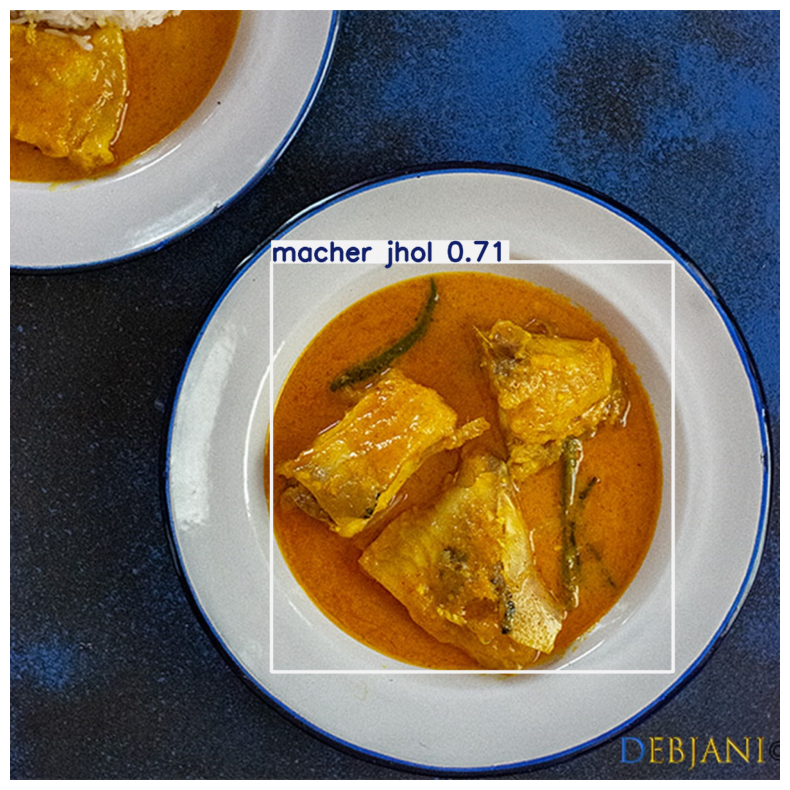

In [44]:
import cv2

result_random = model.predict('/content/Bengali-Doi-Maach-Recipe-Debjanir-Rannaghar-with-video-2.jpg')

annotated = result_random[0].plot()
llWindows()

from IPython.display import Image, display
import matplotlib.pyplot as plt

annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()